<a href="https://colab.research.google.com/github/gudals6676/Deep_Learning/blob/main/04_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 0~9까지의 손글씨 이미지 데이터를 분류하는 모델을 만들어보자!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 케라스에서 지원하는 딥러닝 학습용 손글씨 데이터를 임포트
from tensorflow.keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# 데이터가 3차원 배열로 크게는 train, test로 나뉘어져 있고
# 각 train, test 안에 문제와 정답 데이터로 한 번 더 나뉘어져 있음
len(data)

2

In [ ]:
print(len(data[0]))     #train
print(len(data[1]))     #test
print(len(data[0][0]))  #X_train
print(len(data[0][1]))  #y_train
print(len(data[1][0]))  #X_test
print(len(data[1][1]))  #y_test

2
2
60000
60000
10000
10000


In [ ]:
X_train = data[0][0]  #X_train
y_train = data[0][1]  #y_train
X_test = data[1][0]  #X_test
y_test = data[1][1] #y_test

In [ ]:
print(X_train.shape) # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(X_test.shape)
print(y_train.shape) # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

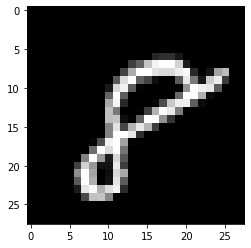

In [ ]:
plt.imshow(X_train[59999], cmap='gray')
# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap = 'gray' 이미지를 흑백으로 전환시켜주는 명령

In [ ]:
print(X_train[59999])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [ ]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


- 딥러닝 신경망에서는 2차원 이미지 데이터를 한 번에 넣을수가 없기 때문에 데이터의 차원을 1차원으로 변경시켜 넣어주어야 함!

In [ ]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 일렬로 펴줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [ ]:
# 이미지는 픽셀 하나하나가 하나의 특성으로 인식됨(28*28=784)
X_train.shape, X_test.shape, y_train_one_hot.shape

((60000, 784), (10000, 784), (60000, 10))

신경망 구조를 직접 설계해보자!

### 신경망 구조를 직접 설계해보자!
- 입력 특성 수
- 출력층 활성화 함수(activation)
- 손실함수(loss)
- 최적화함수(optimizer)

In [ ]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성

In [ ]:
# 1. 신경망 구조 설계
md = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
md.add(Dense(300, input_dim= 784, activation= "sigmoid"))

# 중간층
md.add(Dense(600, activation="sigmoid"))  # 하나의 층
md.add(Dense(300, activation="sigmoid"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(10, activation="softmax"))

md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 599,410
Trainable params: 599,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h = md.fit(X_train, y_train_one_hot, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4642 - acc: 0.8555
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3162 - acc: 0.9004
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - acc: 0.9131
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2438 - acc: 0.9235
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2168 - acc: 0.9318
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2025 - acc: 0.9352
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1821 - acc: 0.9420
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1765 - acc: 0.9433
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1647 - acc: 0.9463
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1561 - acc: 0.9491
Epoch 11/100
1875/

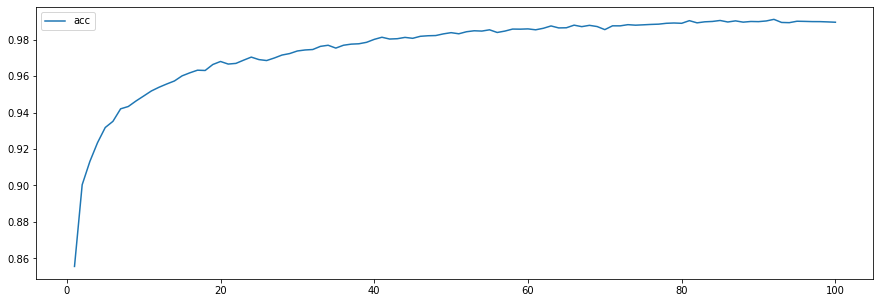

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h.history['acc'],
         label='acc'
         )

plt.legend()
plt.show()

In [ ]:
# 모델 평가
md.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.1111 - acc: 0.9707


[0.11111486703157425, 0.9707000255584717]

### 과대적합을 확인하기 위해 train 데이터에서 검증셋을 분리해서 학습시 같이 출력시켜보자잇!!


In [ ]:
# train_test_split : 무조건 train, test 셋만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나누어주는 명령
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.utils.validation import check_random_state
X_train, X_val, y_train_one_hot, y_val = train_test_split(X_train,
                                                                  y_train_one_hot,
                                                                  random_state=3
                                                                  )

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train_one_hot.shape)
print(y_val.shape)

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(300, input_dim= 784, activation= "sigmoid"))

# 중간층
model.add(Dense(600, activation=""))  # 하나의 층
model.add(Dense(300, activation="sigmoid"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 600)               180600    
_________________________________________________________________
dense_6 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3010      
Total params: 599,410
Trainable params: 599,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
model.compile(loss="categorical_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h1 = model.fit(X_train, y_train_one_hot, 
               epochs=30,
               validation_data=(X_val, y_val) # 검증용 데이터셋을 추가해주는 명령
               )

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4950 - acc: 0.8500 - val_loss: 0.3849 - val_acc: 0.8786
Epoch 2/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3259 - acc: 0.8978 - val_loss: 0.3220 - val_acc: 0.8987
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2932 - acc: 0.9080 - val_loss: 0.2608 - val_acc: 0.9171
Epoch 4/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2561 - acc: 0.9192 - val_loss: 0.2478 - val_acc: 0.9221
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2382 - acc: 0.9256 - val_loss: 0.2352 - val_acc: 0.9243
Epoch 6/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2301 - acc: 0.9267 - val_loss: 0.2301 - val_acc: 0.9242
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2257 - acc: 0.9269 - val_loss: 0.2294 - val_acc: 0.9281
Epoch 8/30
1407/1407 [==============================] - 4s 3ms

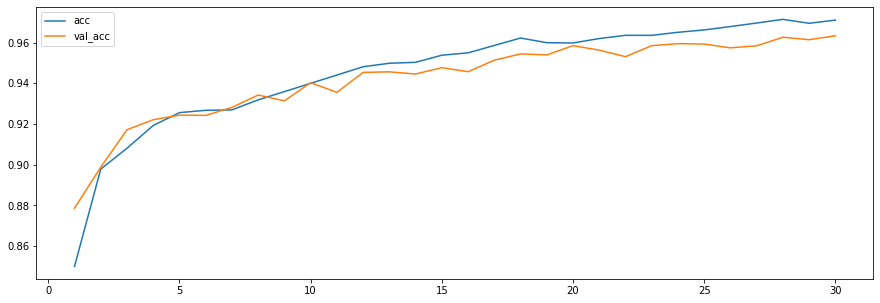

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

# train 데이터
plt.plot(range(1, 31, 1),
         h1.history['acc'],
         label='acc'
         )
# val 데이터
plt.plot(range(1, 31, 1),
         h1.history['val_acc'],
         label='val_acc'
         )
plt.legend()
plt.show()

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.1205 - acc: 0.9632


[0.12045153975486755, 0.9631999731063843]